###  Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [2]:
data = pd.read_csv("used_cars_data.csv")

In [3]:
data.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [4]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


The dataset have 3 differnet data-types of columns with total num of 7254 records and 14 columns 

In [6]:
data.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


Statistical Summary of dataset only related to nuerical columns

In [7]:
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

Check for total unique values in each Columns

### Missing Values Dealing

In [8]:
(data.isnull().sum()/(len(data)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

The percentage of missing values for the columns New_Price and Price is ~86% and ~17%, respectively

In [9]:
def safe_convert(col):
    if isinstance(col, str):
        return float(col.split()[0])
    else:
        return col

In [10]:
data['Mileage'] = data['Mileage'].apply(safe_convert)

In [11]:
mil_mean = data['Mileage'].mean()

In [12]:
mil_mean

18.14158047165911

In [13]:
data["Mileage"].fillna(mil_mean,inplace = True)

In [14]:
data["Mileage"].isna().sum()

0

### Step 3: Data Reduction

In [15]:
data = data.drop(['S.No.'], axis = 1)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74


we don't want the serial num column it is useless for us in dataset  after removing it from dataset

We start our Feature Engineering as we need to add some columns required for analysis.

### Featuring Engineering

New feature is created Car_Age to get info of each car's age

In [16]:
from datetime import date
date.today().year
data['Car_Age']=date.today().year-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74,11


Two other's categorical features are created to take a look in more detail analysis of dataset

In [17]:
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [18]:
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [19]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179 CC,187.7 bhp,5.0,NaN,27.00,10,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.00,2179 CC,115 bhp,5.0,NaN,17.50,12,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.60,1998 CC,112 bhp,5.0,NaN,23.00,7,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.70,2179 CC,187.7 bhp,5.0,NaN,55.76,6,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,7,Mini,CooperConvertible


In [20]:
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

In [21]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,NaN,1.75,14,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50,9,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00,12,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74,11,Audi,A4New


### Performing EDA 

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7253.0,18.141580,4.561567,0.00,15.17,18.16,21.10,33.54
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00
Car_Age,7253.0,10.634634,3.254421,5.00,8.00,10.00,13.00,28.00


### From the statistics summary, we can infer the below findings :
The years range from 1996 to 2019 and have a high point in the range that indicates secondhand cars include both the newest and older models.

Approximately 58k kilometers are driven in used cars on average. The max numbers indicate 650000 KM, which is an indication of an anomaly. The range displays a significant discrepancy between the min and max. It is possible to delete this record.

Cars with zero mileage won't be sold, according to the minimum mileage value. It sounds like a problem with data entry.

The data appears to be skewed to the right and to include outliers for Engine and Power.

Five seats are typically found in a car. A vehicle seat's contribution to the price is significant.

The maximum cost of a used car is 160k, which is quite high for a used vehicle. An outlier or a problem with data input might exist.

### describe(include=’all’) provides a statistics summary of all data, include object, category etc

In [23]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7253.0,NaN,NaN,NaN,18.14158,4.561567,0.0,15.17,18.16,21.1,33.54
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Before we do EDA, lets separate Numerical and categorical variables for easy analysis

In [24]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Engine',
       'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage', 'Seats', 'Price', 'Car_Age']


### Univariate Analysis

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

### Data Transformation
Before we proceed to Bi-variate Analysis, Univariate analysis demonstrated the data pattern as some variables to be transformed.

Price and Kilometer-Driven variables are highly skewed and on a larger scale. Let’s do log transformation.

Log transformation can help in normalization, so this variable can maintain standard scale with other variables:


In [25]:
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7253 non-null   float64
 8   Engine                 7207 non-null   object 
 9   Power                  7207 non-null   object 
 10  Seats                  7200 non-null   float64
 11  New_Price              1006 non-null   object 
 12  Price                  6019 non-null   float64
 13  Car_Age                7253 non-null   int64  
 14  Brand                  7253 non-null   object 
 15  Mode

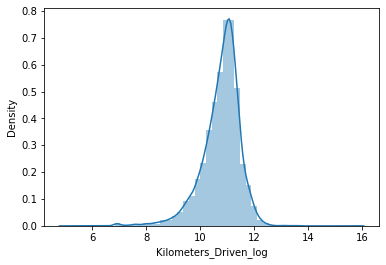

In [26]:
log_transform(data,['Kilometers_Driven','Price'])
log_transform(data,['Kilometers_Driven','Price'])

sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");

# Bivariate Analysis

### A bar plot can be used to show the relationship between Categorical variables and continuous variables 

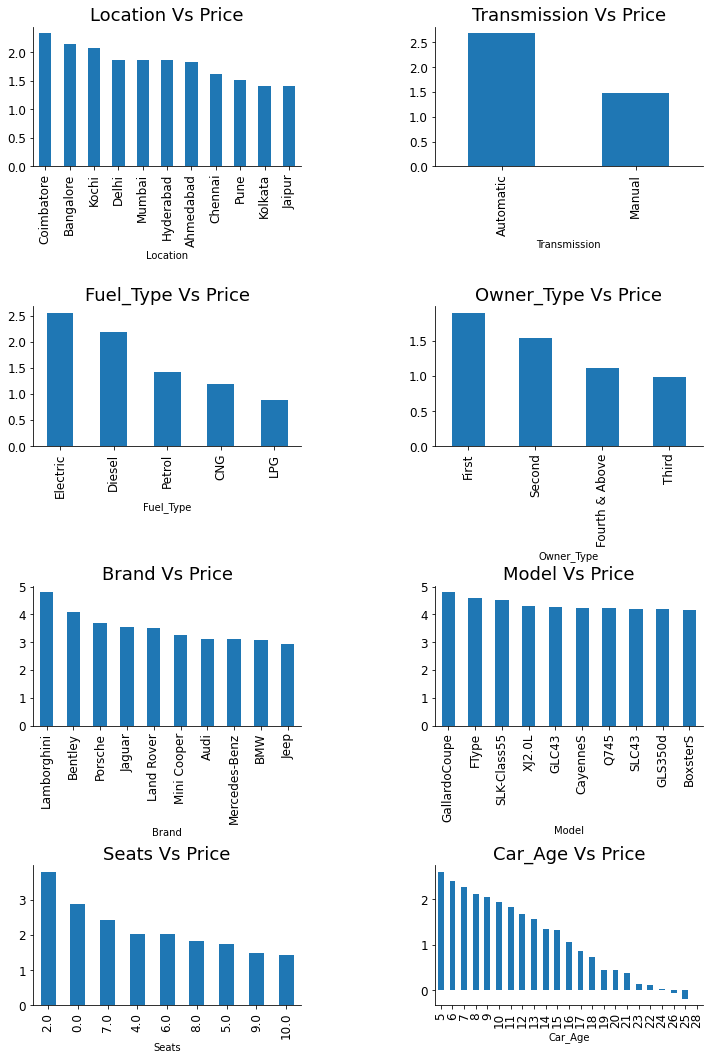

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_grouped_bar_charts(data):
    fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
    
    data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
    axarr[0][0].set_title("Location Vs Price", fontsize=18)
    
    data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
    axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
    
    data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
    axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
    
    data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
    axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
    
    data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
    axarr[2][0].set_title("Brand Vs Price", fontsize=18)
    
    data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
    axarr[2][1].set_title("Model Vs Price", fontsize=18)
    
    data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
    axarr[3][0].set_title("Seats Vs Price", fontsize=18)
    
    data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
    axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
    
    plt.subplots_adjust(hspace=1.0)
    plt.subplots_adjust(wspace=.5)
    
    sns.despine()
    
    plt.show()


plot_grouped_bar_charts(data)


# Observations with respect to price
Cars price more in Coimbatore than they do in Kolkata or Jaipur.

Compared to manual autos, automatic cars are more expensive.

The price of an electric automobile is approximately the same as that of a diesel car, and the lowest priced car is an LPG 
car.

Cars with a first owner cost more money than those with a second.

The price for the third owner is less than that of the fourth and beyond.

The most expensive brand is Lamborghini.

The most expensive model is the Gallardocoupe.

The most expensive seat is a two-seater, then a seven-seater.

The newest models of autos are expensive.


# Relational Graph

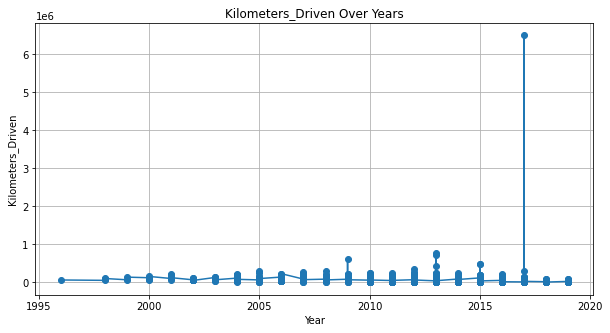

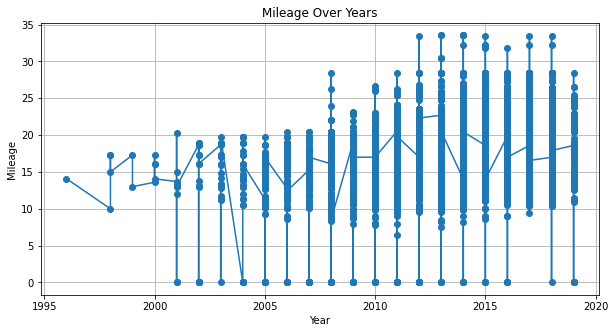

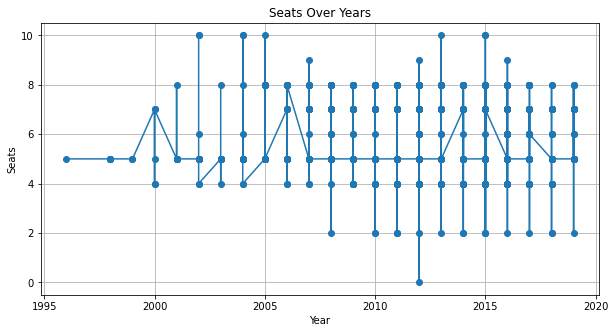

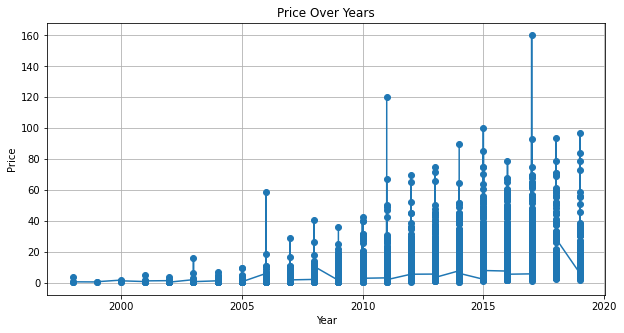

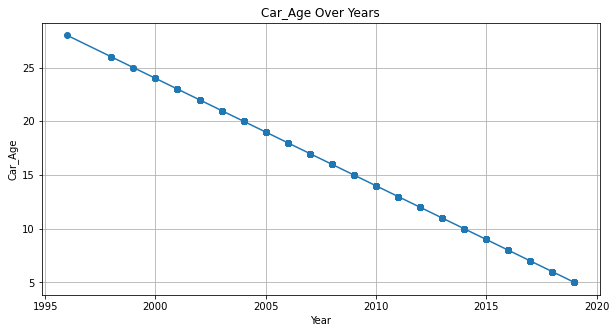

In [28]:
def plot_line_graph(data, column):
    data_sorted = data.sort_values(by='Year')
    
    plt.figure(figsize=(10, 5))
    plt.plot(data_sorted['Year'], data_sorted[column], marker='o') 
    plt.title(f'{column} Over Years')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


for col in num_cols[1:]:
    plot_line_graph(data, col)


# Multivariate Analysis
Multivariate analysis examines more than two variables, as the name implies. For every dataset, multivariate analysis is one of the best tools for identifying links and examining trends.

One common tool for multivariate analysis is a heat map.

Whether there is a positive or negative correlation between the variables is indicated by the heat map.


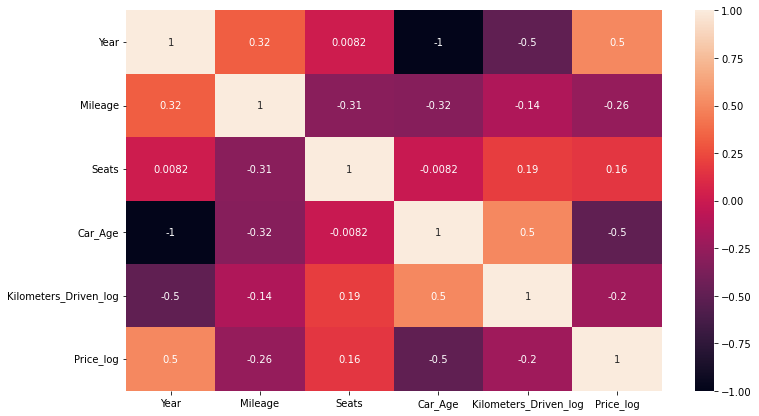

In [32]:
# def plot_correlation_heatmap(data, cols_to_drop=None):
#     if cols_to_drop is not None:
#         data = data.drop(cols_to_drop, axis=1)
#     corr_matrix = data.corr()
    
#     plt.figure(figsize=(12, 7))
#     sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)
#     plt.title('Correlation Heatmap')
#     plt.show()

# plot_correlation_heatmap(data, cols_to_drop=['Kilometers_Driven', 'Price'])
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

### We may deduce the following information from the heat map:

Power 0.86 exhibits a robust positive association with the engine.

Price and Engine 0.69 and Power 0.77 have a positive association.

Price, Engine, and Power have all had a negative correlation with mileage.

The price and year have a somewhat positive association.

Miles traveled is negatively correlated with the year, although it has no effect on cost.

Price and car_age are negatively correlated.

Kilometers and car_age have a positive correlation.There is a clear negative association between the number of miles driven and the age of the car, which makes sense.
